In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load excel file
xl = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', None)

In [3]:
xl.keys()

dict_keys(['Read_Me', ' Variable List', 'Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'INSECURITY', 'TAXES', 'LOCAL', 'HEALTH', 'SOCIOECONOMIC'])

In [20]:
# # Load separate excel sheets as dataframes
var_list = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', ' Variable List')
# supp_count = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'Supplemental Data - County')
# supp_state = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'Supplemental Data - State')
# tax = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'TAXES')
# health = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'HEALTH')

In [5]:
# Load separate excel sheets as dataframes
access = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'ACCESS')
stores = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'STORES')
rest = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'RESTAURANTS')
assist = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'ASSISTANCE')
insec = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'INSECURITY')
local = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'LOCAL')
soc_ec = pd.read_excel(r'./../data/FoodEnvironmentAtlas.xls', 'SOCIOECONOMIC')

In [6]:
# storing dataframe names and excel sheet names
dfs = [access, stores, rest, assist, insec, local, soc_ec]
df_names = ['ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'INSECURITY', 'LOCAL', 'SOCIOECONOMIC']

#### Preparing FIPS columns in all dataframes

In [7]:
# All dfs have same number of counties 
for c in dfs:
    print(c.shape)

(3143, 44)
(3143, 39)
(3143, 19)
(3143, 57)
(3143, 9)
(3144, 100)
(3143, 18)


Only local has 3144 rows. As we will see in the next steps, its data type is also not correct. This is due to the null value in FIPS county. Since only one row has missing county number and because other dataframes all have 3143 counties, I will remove the one row that has the missing value.

In [8]:
#  Check data type
# All FIPS columns should be int
for c in dfs:
    print(c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3143 non-null   int64  
 1   State                      3143 non-null   object 
 2   County                     3143 non-null   object 
 3   LACCESS_POP10              3143 non-null   float64
 4   LACCESS_POP15              3124 non-null   float64
 5   PCH_LACCESS_POP_10_15      3117 non-null   float64
 6   PCT_LACCESS_POP10          3143 non-null   float64
 7   PCT_LACCESS_POP15          3124 non-null   float64
 8   LACCESS_LOWI10             3143 non-null   float64
 9   LACCESS_LOWI15             3123 non-null   float64
 10  PCH_LACCESS_LOWI_10_15     3115 non-null   float64
 11  PCT_LACCESS_LOWI10         3143 non-null   float64
 12  PCT_LACCESS_LOWI15         3123 non-null   float64
 13  LACCESS_HHNV10             3143 non-null   float

In [9]:
print(local['FIPS'].isnull().sum())
# Removing row with no FIPS code in the dataframe 'local'
local.dropna(axis=0, subset=['FIPS'], inplace=True)
local['FIPS'] = pd.to_numeric(local['FIPS']).astype('int64')  #change to int64

1


#### Investigating population distributions 2015

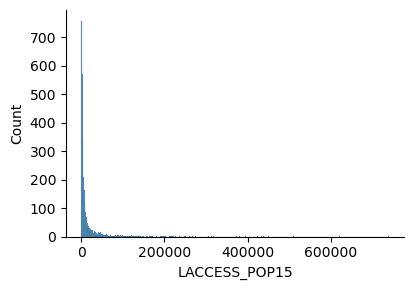

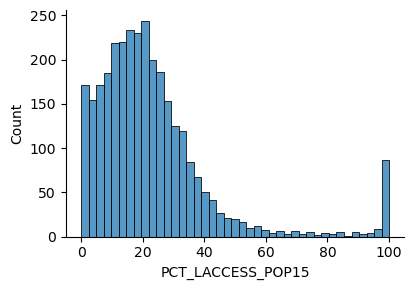

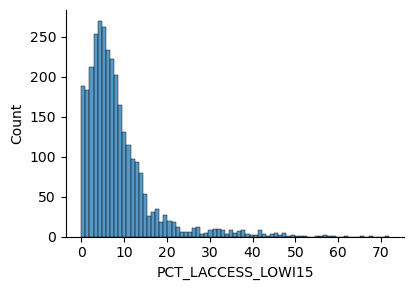

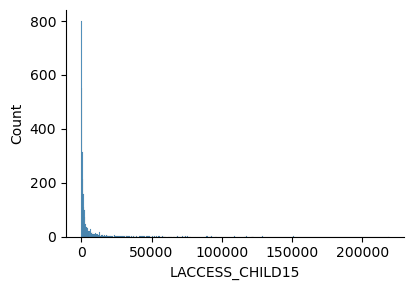

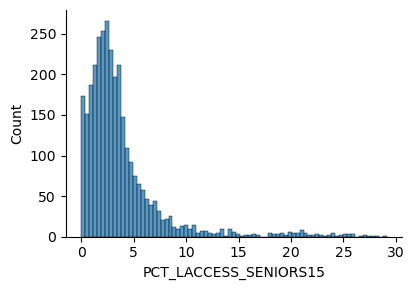

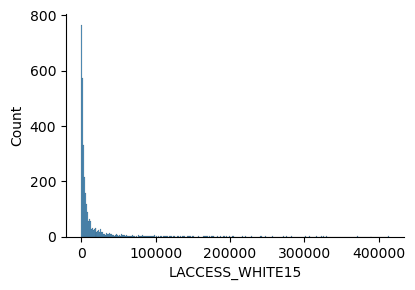

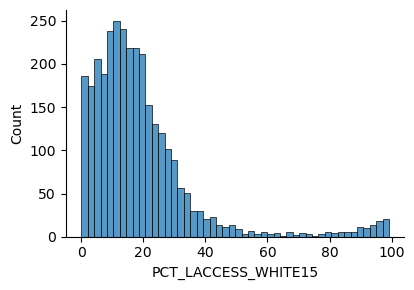

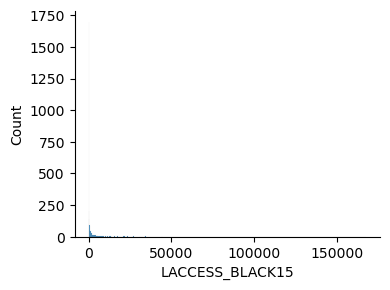

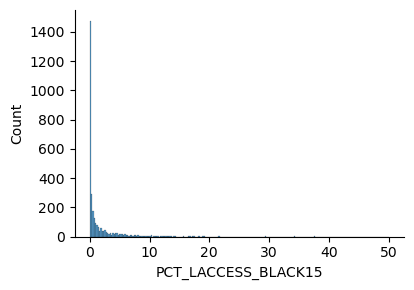

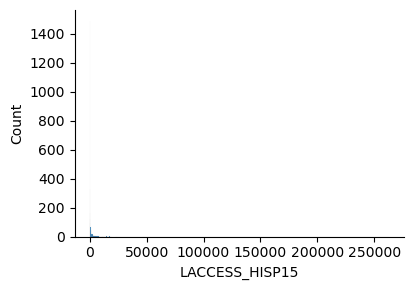

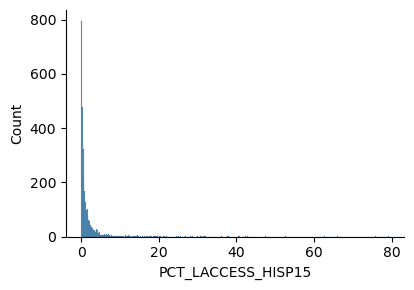

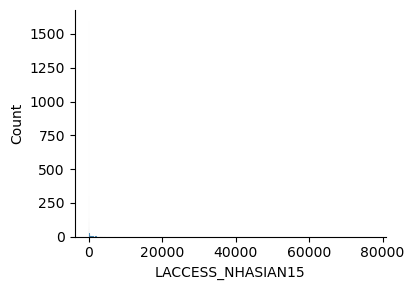

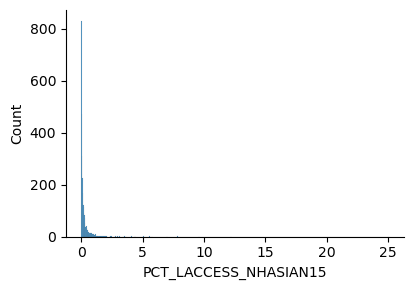

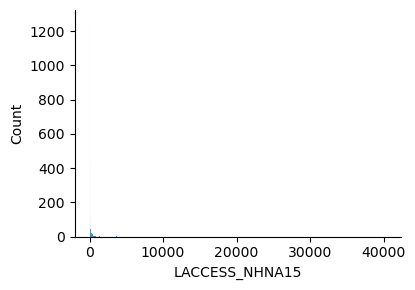

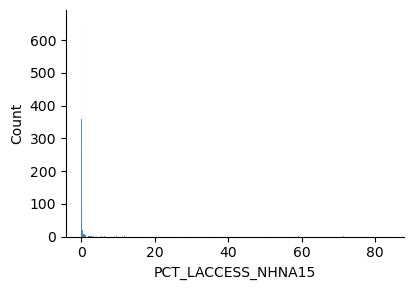

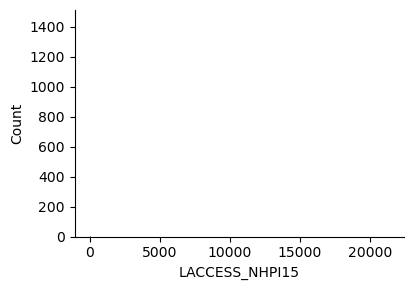

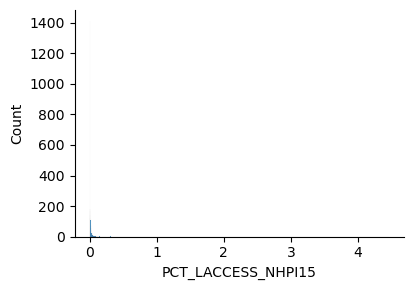

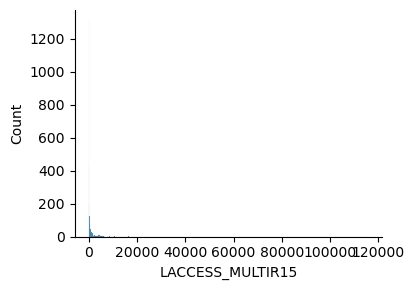

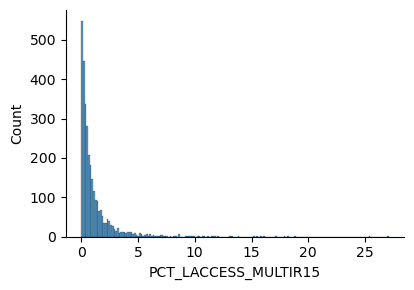

In [10]:
col_dist = ['LACCESS_POP15','PCT_LACCESS_POP15','PCT_LACCESS_LOWI15','LACCESS_CHILD15',
            'PCT_LACCESS_SENIORS15','LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
       'PCT_LACCESS_MULTIR15']

for c in col_dist:
    sns.displot(data=access, x=c, height=3, aspect=11.7/8.27)

In [11]:
# Checking total population percentages match up 2015
cols = ['FIPS','State','LACCESS_WHITE15', 'LACCESS_BLACK15', 'LACCESS_HISP15', 'LACCESS_NHASIAN15', 
        'LACCESS_NHNA15', 'LACCESS_NHPI15', 'LACCESS_MULTIR15']
pop_sum = pd.DataFrame(access, columns=cols)
cols.remove('FIPS')
cols.remove('State')

pop_sum['sum'] = access[cols].sum(axis=1)
pop_sum['pop15'] = access['LACCESS_POP15']
pop_sum['dif'] = pop_sum['pop15']-pop_sum['sum']

# sns.displot(data=pop_sum, x='dif')
pop_sum

,FIPS,State,LACCESS_WHITE15,LACCESS_BLACK15,LACCESS_HISP15,LACCESS_NHASIAN15,LACCESS_NHNA15,LACCESS_NHPI15,LACCESS_MULTIR15,sum,pop15,dif
0,1001,AL,12640.615414,4216.473194,471.136164,86.767975,61.169869,8.817961,482.848633,17967.829209,17496.693038,-471.136171
1,1003,AL,25483.186811,3540.965826,1377.874834,212.946378,181.649648,14.819634,1127.696098,31939.139230,30561.264430,-1377.874800
2,1005,AL,2828.876711,2713.124930,509.377525,17.096410,39.960527,8.082376,462.382655,6578.901133,6069.523628,-509.377505
3,1007,AL,540.512239,419.099942,8.596762,1.994318,2.513097,0.000000,5.259244,977.975603,969.378841,-8.596762
4,1009,AL,3387.241266,95.842687,497.489891,8.428994,28.938242,1.062851,202.914187,4221.918119,3724.428242,-497.489876
...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,16811.003936,186.278452,2661.350520,114.722086,189.621441,27.720443,1605.391465,21596.088342,18934.737809,-2661.350533
3139,56039,WY,5648.425247,9.089826,736.174507,53.489780,32.482255,8.468847,460.434464,6948.564925,6212.390430,-736.174496
3140,56041,WY,4259.949882,14.989817,535.616715,13.831709,40.339658,6.586104,350.320469,5221.634355,4686.017653,-535.616702
3141,56043,WY,883.877353,2.000000,35.474502,6.366775,5.006976,0.000000,34.160542,966.886148,931.411647,-35.474501


In [13]:
outlier = pop_sum[pop_sum['dif']< -10000]
outlier.shape
outlier.to_pickle(r'./../data/Outlier2015.pkl')

In [14]:
# pd.set_option("display.max_columns", 6)
# outlier

In [15]:
outlier['State'].value_counts()

TX    30
CA    23
FL    15
NM     7
AZ     6
CO     6
IL     6
NJ     6
GA     5
NC     4
NY     3
WA     3
MA     3
CT     3
OK     2
IN     2
VA     2
UT     2
NV     2
MD     2
HI     1
OH     1
MN     1
OR     1
PA     1
SC     1
TN     1
KS     1
MO     1
MI     1
Name: State, dtype: int64

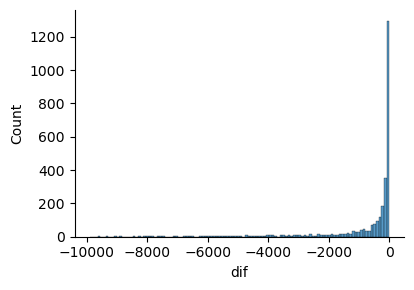

In [16]:
outlier = pop_sum[(pop_sum['dif']>-10000)& (pop_sum['dif']<0)]
sns.displot(data=outlier, x='dif', height=3, aspect=11.7/8.27)

All distributions are exponentially decreasing. Unusual spike seen for some % distributions at the end may be becasue some rural counties have less access to stores.  
1) Population distribution itself doesn't have the spike at large populations. For counties will high % low access, do they have less population?
2) Mismatch between the given population value and aggregate race population for 2015: aggregate is mostly greater, may be due to double counting or crossover of race population?

#### Investigating distributions 2010

In [17]:
access10 = ['FIPS', 'State', 'LACCESS_POP10', 'PCT_LACCESS_POP10','LACCESS_LOWI10','PCT_LACCESS_LOWI10']
soc_ec10 = ['FIPS','PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',
            'PCT_NHNA10', 'PCT_NHPI10']

df_10 = pd.DataFrame(access,
                     columns=access10).merge(pd.DataFrame(soc_ec,columns=soc_ec10),on='FIPS')
df_10

,FIPS,State,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10
0,1001,AL,18428.439685,33.769657,5344.427472,9.793530,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314
1,1003,AL,35210.814078,19.318473,9952.144027,5.460261,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343
2,1005,AL,5722.305602,20.840972,3135.676086,11.420316,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409
3,1007,AL,1044.867327,4.559753,491.449066,2.144661,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548
4,1009,AL,1548.175559,2.700840,609.027708,1.062468,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402
...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,13391.715505,30.570505,2414.618816,5.512073,80.883897,0.947359,15.269598,0.739625,0.723645,0.093594
3139,56039,WY,6212.423697,29.174527,1059.463554,4.975409,82.206255,0.150277,14.985442,1.070724,0.356908,0.061050
3140,56041,WY,4270.147119,20.220414,1518.415783,7.190150,88.531111,0.227294,8.783976,0.279383,0.582442,0.161000
3141,56043,WY,931.411647,10.915407,233.628356,2.737939,83.886089,0.257823,13.617719,0.539084,0.597680,0.011719


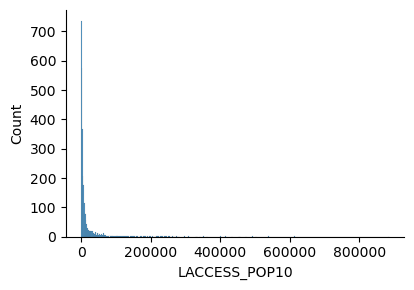

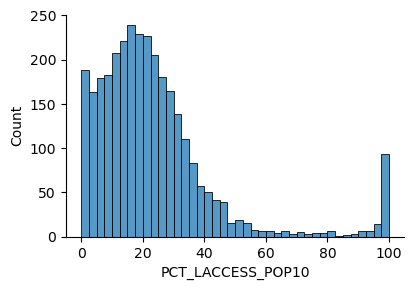

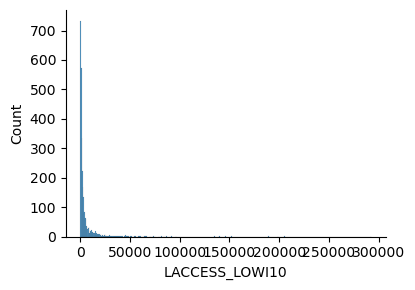

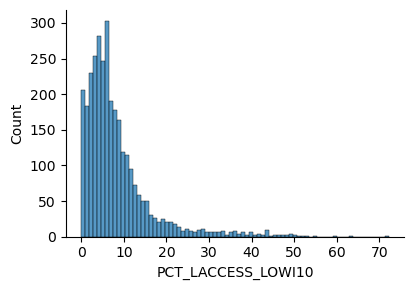

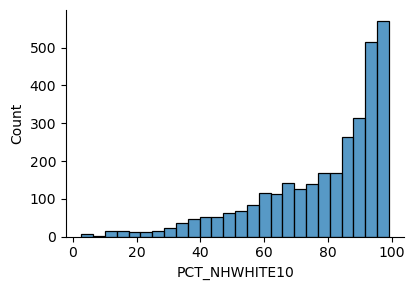

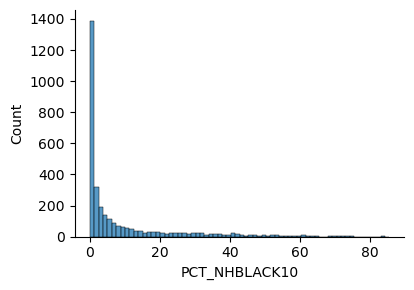

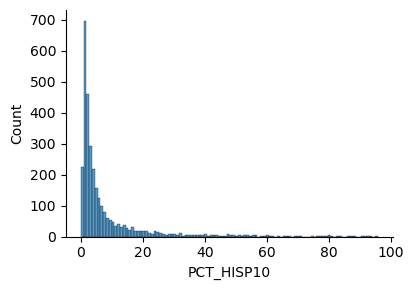

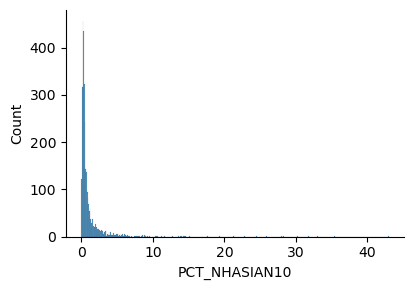

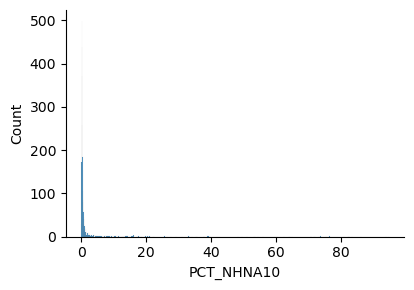

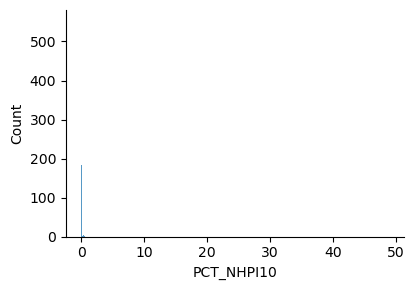

In [18]:
cols = list(df_10.columns)
cols.remove('FIPS')
cols.remove('State')
for c in cols:
    sns.displot(data=df_10, x=c, height=3, aspect=11.7/8.27)

#### Exploring and selecting variables

In [21]:
# Investigating variables in the dataset
for c in df_names:
    print(var_list[var_list['Category Code'] == str(c)])

                            Category Name Category Code     Subcategory Name  \
0   Access and Proximity to Grocery Store        ACCESS              Overall   
1   Access and Proximity to Grocery Store        ACCESS              Overall   
2   Access and Proximity to Grocery Store        ACCESS              Overall   
3   Access and Proximity to Grocery Store        ACCESS              Overall   
4   Access and Proximity to Grocery Store        ACCESS              Overall   
5   Access and Proximity to Grocery Store        ACCESS  Household Resources   
6   Access and Proximity to Grocery Store        ACCESS  Household Resources   
7   Access and Proximity to Grocery Store        ACCESS  Household Resources   
8   Access and Proximity to Grocery Store        ACCESS  Household Resources   
9   Access and Proximity to Grocery Store        ACCESS  Household Resources   
10  Access and Proximity to Grocery Store        ACCESS  Household Resources   
11  Access and Proximity to Grocery Stor

In [23]:
# Show all columns
pd.set_option('display.max_columns', None)

In [24]:
# Preparing dataframes for merge (only dataframes that are of interest)
# Remove common columns (State and County names) that would be double counted in the merge
df_remstate = [stores, rest, assist, insec, local, soc_ec]
for c in df_remstate:
    c.drop(labels=['State','County'], axis=1, inplace=True)

In [25]:
# Number of columns is reduced by 2 for all dfs except access
for c in df_remstate: 
    print(c.shape)

(3143, 37)
(3143, 17)
(3143, 55)
(3143, 7)
(3143, 98)
(3143, 16)


In [26]:
# Keep only needed variables

# Removing 23
access.drop(labels=['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15', 'LACCESS_LOWI10', 'LACCESS_LOWI15',
                    'PCH_LACCESS_LOWI_10_15', 'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15',
                    'LACCESS_SNAP15', 'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 
                    'LACCESS_SENIORS10', 'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15', 'LACCESS_WHITE15', 
                    'LACCESS_BLACK15', 'LACCESS_HISP15', 'LACCESS_NHASIAN15', 'LACCESS_NHNA15', 
                    'LACCESS_NHPI15', 'LACCESS_MULTIR15'], axis=1, inplace=True)
# Removing 26
stores.drop(labels=['GROC11', 'GROC16', 'PCH_GROC_11_16', 'PCH_GROCPTH_11_16', 'SUPERC11', 'SUPERC16',
                    'PCH_SUPERC_11_16', 'PCH_SUPERCPTH_11_16', 'CONVS11', 'CONVS16', 'PCH_CONVS_11_16', 
                    'PCH_CONVSPTH_11_16', 'SPECS11', 'SPECS16', 'PCH_SPECS_11_16', 'PCH_SPECSPTH_11_16',
                    'SNAPS12', 'SNAPS17', 'PCH_SNAPS_12_17', 'PCH_SNAPSPTH_12_17', 'WICS11', 'WICS16',
                    'PCH_WICS_11_16', 'WICSPTH11', 'WICSPTH16', 'PCH_WICSPTH_11_16'], axis=1, inplace=True)
# Removing 8
rest.drop(labels=['FFR11', 'FFR16', 'PCH_FFR_11_16', 'PCH_FFRPTH_11_16', 'FSR11', 'FSR16',
                  'PCH_FSR_11_16', 'PCH_FSRPTH_11_16'], axis=1, inplace=True)
# Removing 37 
assist.drop(labels=['REDEMP_SNAPS12', 'REDEMP_SNAPS17', 'PCH_REDEMP_SNAPS_12_17', 'PCH_SNAP_12_17',
                    'PC_SNAPBEN12', 'PC_SNAPBEN17', 'PCH_PC_SNAPBEN_12_17', 'SNAP_OAPP09',
                    'SNAP_OAPP16', 'SNAP_CAP09', 'SNAP_CAP16', 'SNAP_BBCE09', 'SNAP_BBCE16',
                    'SNAP_REPORTSIMPLE09', 'SNAP_REPORTSIMPLE16', 'PCH_NSLP_12_17', 'PCH_SBP_12_17',
                    'PCH_SFSP_12_17', 'PC_WIC_REDEMP11', 'PC_WIC_REDEMP16', 'PCH_PC_WIC_REDEMP_11_16', 
                    'REDEMP_WICS11', 'REDEMP_WICS16', 'PCH_REDEMP_WICS_11_16', 'PCT_WIC12', 'PCT_WIC17',
                    'PCH_WIC_12_17', 'PCT_WICINFANTCHILD14', 'PCT_WICINFANTCHILD16', 'PCH_WICINFANTCHILD_14_16',
                    'PCT_WICWOMEN14', 'PCT_WICWOMEN16', 'PCH_WICWOMEN_14_16', 'PCT_CACFP12', 'PCT_CACFP17',
                    'PCH_CACFP_12_17', 'PCH_FDPIR_12_15'], axis=1, inplace=True)
# Removing 4
insec.drop(labels=['CH_FOODINSEC_14_17', 'VLFOODSEC_12_14', 'VLFOODSEC_15_17',
                   'CH_VLFOODSEC_14_17'], axis=1, inplace=True)
# Removing 92
local.drop(labels=['PCH_DIRSALES_FARMS_07_12', 'PCT_LOCLFARM07', 'PCT_LOCLFARM12', 'PCT_LOCLSALE07',
                   'PCT_LOCLSALE12', 'DIRSALES07', 'DIRSALES12', 'PCH_DIRSALES_07_12', 'PC_DIRSALES07',
                   'PC_DIRSALES12', 'PCH_PC_DIRSALES_07_12','FMRKT13', 'FMRKT18', 'PCH_FMRKT_13_18',
                   'PCH_FMRKTPTH_13_18', 'FMRKT_SNAP18', 'PCT_FMRKT_SNAP18', 'FMRKT_WIC18',
                   'PCT_FMRKT_WIC18', 'FMRKT_WICCASH18', 'PCT_FMRKT_WICCASH18', 'FMRKT_SFMNP18',
                   'PCT_FMRKT_SFMNP18','FMRKT_CREDIT18', 'PCT_FMRKT_CREDIT18', 'FMRKT_FRVEG18',
                   'PCT_FMRKT_FRVEG18', 'FMRKT_ANMLPROD18', 'PCT_FMRKT_ANMLPROD18', 'FMRKT_BAKED18',
                   'PCT_FMRKT_BAKED18', 'FMRKT_OTHERFOOD18', 'PCT_FMRKT_OTHERFOOD18', 'VEG_FARMS07',
                   'VEG_FARMS12','PCH_VEG_FARMS_07_12', 'VEG_ACRES07', 'VEG_ACRES12','PCH_VEG_ACRES_07_12',
                   'VEG_ACRESPTH07', 'VEG_ACRESPTH12', 'PCH_VEG_ACRESPTH_07_12', 'FRESHVEG_FARMS07',
                   'FRESHVEG_FARMS12', 'PCH_FRESHVEG_FARMS_07_12', 'FRESHVEG_ACRES07', 'FRESHVEG_ACRES12',
                   'PCH_FRESHVEG_ACRES_07_12', 'FRESHVEG_ACRESPTH07', 'FRESHVEG_ACRESPTH12',
                   'PCH_FRESHVEG_ACRESPTH_07_12', 'ORCHARD_FARMS07', 'ORCHARD_FARMS12', 
                   'PCH_ORCHARD_FARMS_07_12', 'ORCHARD_ACRES07', 'ORCHARD_ACRES12', 'PCH_ORCHARD_ACRES_07_12',
                   'ORCHARD_ACRESPTH07', 'ORCHARD_ACRESPTH12', 'PCH_ORCHARD_ACRESPTH_07_12', 'BERRY_FARMS07',
                   'BERRY_FARMS12', 'PCH_BERRY_FARMS_07_12', 'BERRY_ACRES07', 'BERRY_ACRES12', 
                   'PCH_BERRY_ACRES_07_12', 'BERRY_ACRESPTH07', 'BERRY_ACRESPTH12', 
                   'PCH_BERRY_ACRESPTH_07_12', 'SLHOUSE07', 'SLHOUSE12', 'PCH_SLHOUSE_07_12',
                   'GHVEG_FARMS07', 'GHVEG_FARMS12', 'PCH_GHVEG_FARMS_07_12', 'GHVEG_SQFT07', 'GHVEG_SQFT12',
                   'PCH_GHVEG_SQFT_07_12', 'GHVEG_SQFTPTH07', 'GHVEG_SQFTPTH12', 'PCH_GHVEG_SQFTPTH_07_12',
                   'CSA07', 'CSA12', 'PCH_CSA_07_12', 'AGRITRSM_OPS07', 'AGRITRSM_OPS12', 
                   'PCH_AGRITRSM_OPS_07_12', 'AGRITRSM_RCT07', 'AGRITRSM_RCT12', 'PCH_AGRITRSM_RCT_07_12', 
                   'FARM_TO_SCHOOL13', 'FARM_TO_SCHOOL15'], axis=1, inplace=True)

# Removing 3
soc_ec.drop(labels=['PERPOV10','PERCHLDPOV10','POPLOSS10'], axis=1, inplace=True)

In [27]:
for c in df_remstate:
    print(c.shape)

(3143, 11)
(3143, 9)
(3143, 18)
(3143, 3)
(3143, 6)
(3143, 13)


In [28]:
# Checking uniqueness of county codes
access['FIPS'].nunique()

3143

#### Merging dataframes

In [29]:
# Merging 7 dataframes of interest on FIPS code unique to counties
df_comb = access.merge(stores,on='FIPS').merge(rest,on='FIPS').merge(assist,on='FIPS').merge(
    insec,on='FIPS').merge(local,on='FIPS').merge(soc_ec,on='FIPS')
df_comb.head()

,FIPS,State,County,PCT_LACCESS_POP10,PCT_LACCESS_POP15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_NHNA15,PCT_LACCESS_NHPI15,PCT_LACCESS_MULTIR15,GROCPTH11,GROCPTH16,SUPERCPTH11,SUPERCPTH16,CONVSPTH11,CONVSPTH16,SPECSPTH11,SPECSPTH16,SNAPSPTH12,SNAPSPTH17,FFRPTH11,FFRPTH16,FSRPTH11,FSRPTH16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,PCT_SNAP12,PCT_SNAP17,SNAP_PART_RATE11,SNAP_PART_RATE16,PCT_NSLP12,PCT_NSLP17,PCT_FREE_LUNCH10,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PCT_SBP12,PCT_SBP17,PCT_SFSP12,PCT_SFSP17,FDPIR12,FDPIR15,FOOD_BANKS18,FOODINSEC_12_14,FOODINSEC_15_17,DIRSALES_FARMS07,DIRSALES_FARMS12,FMRKTPTH13,FMRKTPTH18,FOODHUB18,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
0,1001,AL,Autauga,33.769657,32.062255,9.793530,11.991125,3.284786,3.351332,4.608749,8.837112,8.460485,4.376378,3.996279,23.163613,7.726582,0.863345,0.159000,0.112092,0.016159,0.884808,0.090581,0.054271,0.018116,0.018090,0.561604,0.560802,0.018116,0.018090,0.674004,0.804747,0.615953,0.795977,0.579721,0.560802,649.511367,674.80272,484.381507,512.280987,18.908476,16.500056,84.02,86.898,68.226043,63.12659,36.116721,NaN,6.886107,NaN,27.206328,33.475354,3.16032,6.369006,0,0,0,16.8,16.3,25.0,51.0,0.018277,0.017985,NaN,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,18.8,1
1,1003,AL,Baldwin,19.318473,16.767489,5.460261,5.424427,2.147827,1.905114,1.298900,4.343199,3.844936,3.513570,3.061840,13.981393,1.942757,0.755973,0.116833,0.099662,0.008131,0.618712,0.144746,0.139753,0.032166,0.033733,0.573622,0.568650,0.107219,0.130115,0.725055,0.890836,0.648675,0.751775,1.157966,1.137300,649.511367,674.80272,484.381507,512.280987,18.908476,16.500056,84.02,86.898,68.226043,63.12659,36.761939,39.449096,5.542340,6.346384,27.206328,33.475354,3.16032,6.369006,0,0,0,16.8,16.3,80.0,103.0,0.020525,0.018347,NaN,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,19.6,1
2,1005,AL,Barbour,20.840972,22.105560,11.420316,10.739667,4.135869,4.329378,4.303147,3.425062,3.758341,2.805166,3.001695,10.302934,9.881360,1.855183,0.062266,0.145539,0.029436,1.684025,0.219370,0.155195,0.000000,0.038799,0.804358,0.737177,0.109685,0.077598,1.280590,1.424614,0.694673,0.892372,0.621549,0.543183,649.511367,674.80272,484.381507,512.280987,18.908476,16.500056,84.02,86.898,68.226043,63.12659,66.388961,63.985083,4.582140,2.317528,27.206328,33.475354,3.16032,6.369006,0,0,0,16.8,16.3,18.0,13.0,0.111342,0.160765,NaN,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,45.2,0
3,1007,AL,Bibb,4.559753,4.230324,2.144661,2.601627,3.458580,2.821427,0.676710,1.087518,1.015242,0.657008,0.600865,2.358770,1.828933,0.037516,0.008703,0.010967,0.000000,0.022951,0.263794,0.220916,0.043966,0.044183,0.835348,0.662749,0.000000,0.000000,0.719122,0.801423,0.263794,0.309283,0.219829,0.309283,649.511367,674.80272,484.381507,512.280987,18.908476,16.500056,84.02,86.898,68.226043,63.12659,53.502278,52.257676,9.253986,9.060807,27.206328,33.475354,3.16032,6.369006,0,0,0,16.8,16.3,12.0,13.0,0.044413,0.044643,NaN,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,29.3,1
4,1009,AL,Blount,2.700840,6.497380,1.062468,2.880150,3.269380,3.336414,0.812727,0.671490,1.588720,0.340269,0.882583,5.909147,0.167201,0.867886,0.014705,0.050484,0.001854,0.353990,0.121608,0.086863,0.017373,0.017373,0.521177,0.469059,0.017373,0.000000,0.657144,0.692374,0.347451,0.399569,0.260589,0.208471,649.511367,674.80272,484.381507,512.280987,18.908476,16.500056,84.02,86.898,68.226043,63.12659,43.931360,46.624585,8.097947,7.895581,27.206328,33.475354,3.16032,6.369006,0

In [30]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3143 non-null   int64  
 1   State                  3143 non-null   object 
 2   County                 3143 non-null   object 
 3   PCT_LACCESS_POP10      3143 non-null   float64
 4   PCT_LACCESS_POP15      3124 non-null   float64
 5   PCT_LACCESS_LOWI10     3143 non-null   float64
 6   PCT_LACCESS_LOWI15     3123 non-null   float64
 7   PCT_LACCESS_HHNV10     3143 non-null   float64
 8   PCT_LACCESS_HHNV15     3140 non-null   float64
 9   PCT_LACCESS_SNAP15     3123 non-null   float64
 10  PCT_LACCESS_CHILD10    3143 non-null   float64
 11  PCT_LACCESS_CHILD15    3124 non-null   float64
 12  PCT_LACCESS_SENIORS10  3143 non-null   float64
 13  PCT_LACCESS_SENIORS15  3124 non-null   float64
 14  PCT_LACCESS_WHITE15    3124 non-null   float64
 15  PCT_

Total columns is (21+11+9+18+3+6+13)-6=75

In [31]:
#save to pickle file
df_comb.to_pickle(r'./../data/AtlasPreprocess.pkl')